In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.datasets import fetch_20newsgroups

In [58]:
import re

In [59]:
from collections import Counter

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [62]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/zeal.v/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zeal.v/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zeal.v/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zeal.v/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/zeal.v/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/zeal.v/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zeal.v/nltk_data...
[nlt

True

In [63]:
#%pip install datasets

In [64]:
from datasets import load_dataset

In [65]:
dataset = load_dataset("imdb")


In [66]:
dataset.keys()

dict_keys(['train', 'test', 'unsupervised'])

In [67]:
sample_size = 500

train_sample = dataset['train'].shuffle(seed=42).select(range(sample_size))

test_sample = dataset['test'].shuffle(seed=42).select(range(sample_size))

In [68]:
df = pd.DataFrame(train_sample)
df_s = pd.DataFrame(test_sample)
df.rename(columns = {'text':'review', 'label': 'sentiment'}, inplace=True)
df.head()

,review,sentiment
0,There is no relation at all between Fortier an...,1
1,This movie is a great. The plot is very true t...,1
2,"George P. Cosmatos' ""Rambo: First Blood Part I...",0
3,In the process of trying to establish the audi...,1
4,"Yeh, I know -- you're quivering with excitemen...",0


In [69]:
print(df.iloc[120]['review'])

Having been forced by my children to watch this at least 10 times for each of the last 2 Christmases, I feel adequately qualified to pass judgment on this version of Dr. Seuss' classic tale, and well... it's not very good. First off, following a classic act like Chuck Jones' animated TV special is going to be difficult for anyone, but this interpretation is so heavy-handed and padded as to be positively numbing. I will concede that there are a handful of inspired gags, but overall the film comes off as a calculated cash grab, at the same time as it is supposedly decrying the commercialisation of Christmas. Jim Carrey is typically over the top here, but that is completely at odds with the character of the Grinch. As characterised by Boris Karloff, he was a slow burn; methodical and sly. There is no method to Carrey's madness, and that is only the most obvious error made. Talented actors like Jeffrey Tambor and Christine Baranski are utterly wasted here. Why, Universal, why? I mean , I u

In [70]:
df.iloc[120]['sentiment']

0

In [71]:
df['sentiment'].value_counts()

sentiment
0    254
1    246
Name: count, dtype: int64

In [72]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

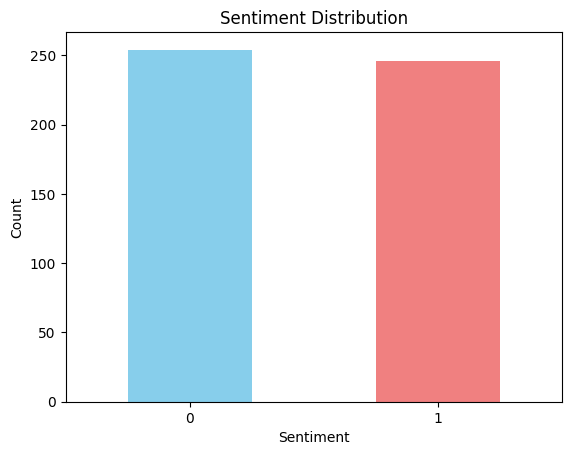

In [73]:
df['sentiment'].value_counts().plot(kind = 'bar', color = ['skyblue','lightcoral'])

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

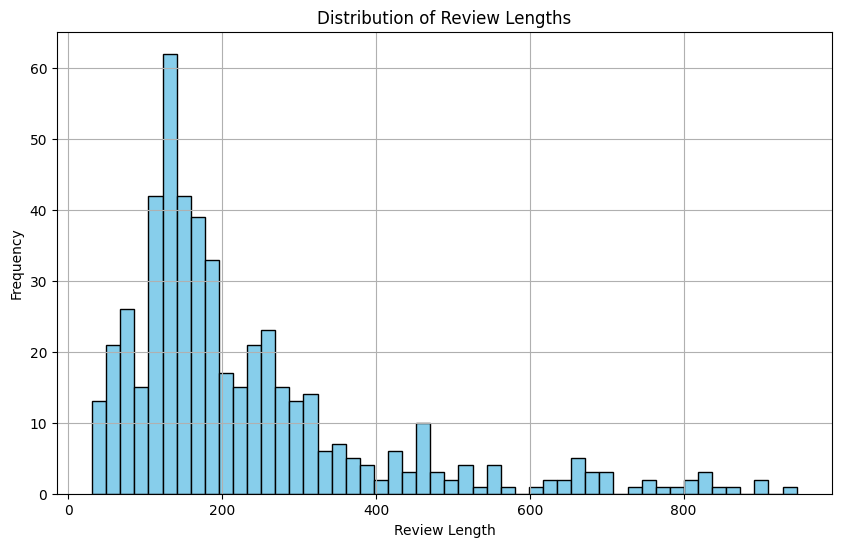

In [74]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize = (10,6))
df['review_length'].hist(bins = 50, color = 'skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [75]:
stop_words = set(stopwords.words('english'))
custom_stop_words = {'br', 'like', 'movie', 'film', 'one','story','time','see','would','films','good','time'}

In [96]:
# Function to clean text data 
def clean_text(text):
    text = text.lower()
    #text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+','',text)
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

In [77]:
positive_reviews = df[df['sentiment'] == 1]['cleaned_review']
negative_reviews = df[df['sentiment'] == 0]['cleaned_review']

In [78]:
positive_reviews

0      there is no relation at all between fortier an...
1      this movie is a great the plot is very true to...
3      in the process of trying to establish the audi...
5      while this movies style isnt as understated an...
6      i give this movie  out of  because the villain...
                             ...                        
476    on the night of his bachelor party paul colema...
482    its time to pay tribute to the great charton h...
484    this movie has taken a lot of stick it was sla...
491    watching john cassavetes film opening night i ...
492    the power of kangwon province is director hong...
Name: cleaned_review, Length: 246, dtype: object

In [79]:
# Function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(reviews):
    tokens = []
    for review in reviews:
        words = word_tokenize(review)
        words = [word for word in words if word not in stop_words and word not in custom_stop_words and len(word) > 1]
        tokens.extend(words)
    return tokens

In [80]:
positive_tokens = tokenize_and_remove_stopwords(positive_reviews)
negative_tokens = tokenize_and_remove_stopwords(negative_reviews)

In [81]:
positive_word_counts = Counter(positive_tokens)
negative_word_counts = Counter(negative_tokens)

In [82]:
positive_word_counts.most_common(15)
negative_word_counts.most_common(15)

[('even', 159),
 ('bad', 144),
 ('really', 140),
 ('dont', 124),
 ('plot', 103),
 ('get', 101),
 ('people', 99),
 ('make', 99),
 ('much', 95),
 ('characters', 87),
 ('could', 85),
 ('made', 79),
 ('well', 79),
 ('think', 77),
 ('acting', 77)]

In [83]:
positive_df = pd.DataFrame(positive_word_counts.most_common(15), columns = ['word', 'count'])
negative_df = pd.DataFrame(negative_word_counts.most_common(15), columns = ['word', 'count'])

In [84]:
positive_df

,word,count
0,also,131
1,great,113
2,even,110
3,much,103
4,really,99
5,well,97
6,show,97
7,many,93
8,first,92
9,get,90


In [85]:
negative_df

,word,count
0,even,159
1,bad,144
2,really,140
3,dont,124
4,plot,103
5,get,101
6,people,99
7,make,99
8,much,95
9,characters,87


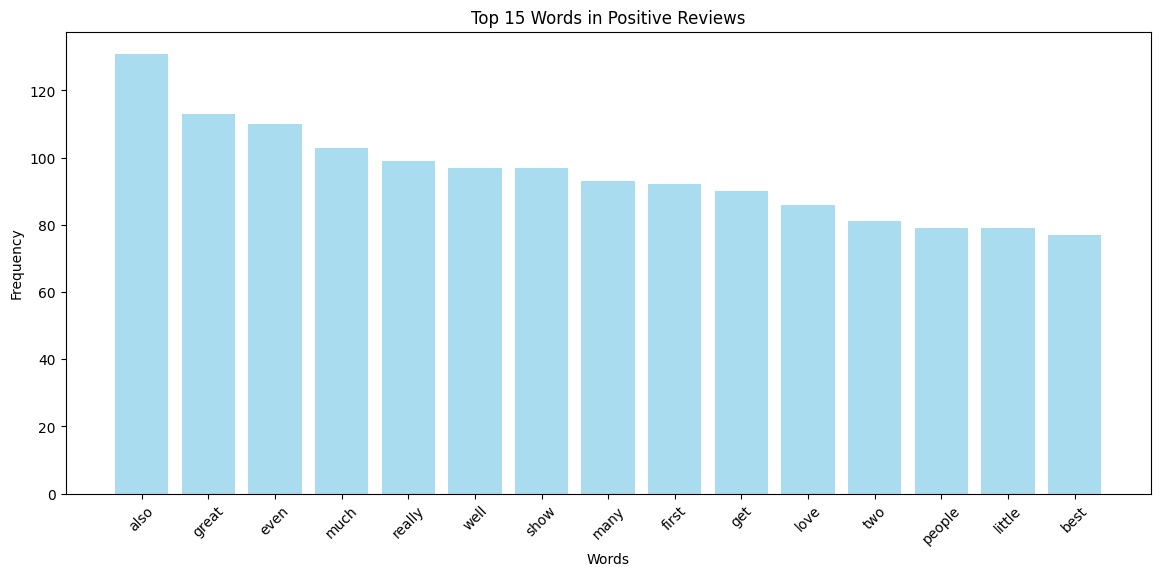

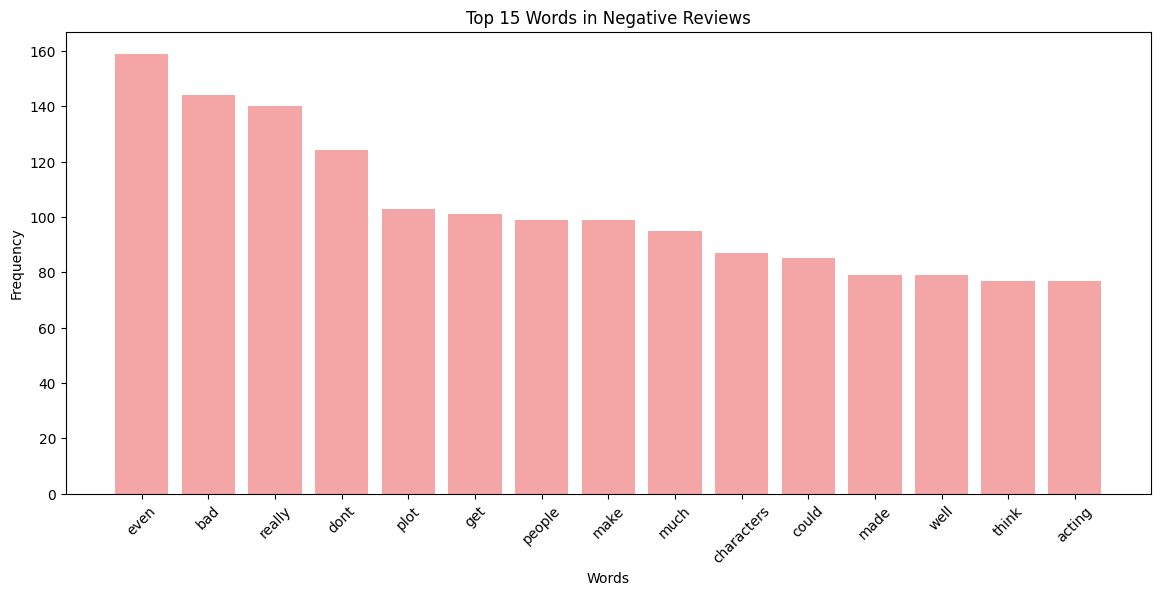

In [86]:
plt.figure(figsize = (14,6))
plt.bar(positive_df['word'], positive_df['count'], color = 'skyblue', alpha = 0.7)
plt.title('Top 15 Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize = (14,6))
plt.bar(negative_df['word'], negative_df['count'], color = 'lightcoral', alpha = 0.7)
plt.title('Top 15 Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [87]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')

In [88]:
df.head()

,review,sentiment,review_length,cleaned_review
0,There is no relation at all between Fortier an...,1,125,there is no relation at all between fortier an...
1,This movie is a great. The plot is very true t...,1,131,this movie is a great the plot is very true to...
2,"George P. Cosmatos' ""Rambo: First Blood Part I...",0,177,george p cosmatos rambo first blood part ii is...
3,In the process of trying to establish the audi...,1,119,in the process of trying to establish the audi...
4,"Yeh, I know -- you're quivering with excitemen...",0,636,yeh i know youre quivering with excitement we...


In [89]:
# check if we can actually use clean_review instead
X_ngram =vectorizer.fit_transform(df['review'])

In [90]:
ngram_df = pd.DataFrame(X_ngram.toarray(),
                        columns = vectorizer.get_feature_names_out())
ngram_df.head()

,000,000 grand,02,02 10,05,05 love,10,10 10,10 12,10 15,...,zooming object,zooms,zooms island,zoos,zoos bad,zsa,zsa gabor,zsa zsa,zu,zu warriors
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
ngram_sum = ngram_df.sum(axis=0).sort_values(ascending=False)
ngram_sum.head()

br       1980
br br     992
movie     899
film      813
like      406
dtype: int64

In [92]:
df.head()

,review,sentiment,review_length,cleaned_review
0,There is no relation at all between Fortier an...,1,125,there is no relation at all between fortier an...
1,This movie is a great. The plot is very true t...,1,131,this movie is a great the plot is very true to...
2,"George P. Cosmatos' ""Rambo: First Blood Part I...",0,177,george p cosmatos rambo first blood part ii is...
3,In the process of trying to establish the audi...,1,119,in the process of trying to establish the audi...
4,"Yeh, I know -- you're quivering with excitemen...",0,636,yeh i know youre quivering with excitement we...


In [98]:
empty_reviews = df['cleaned_review'].str.strip() == ''
empty_reviews.sum()

0

In [99]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words_list = list(ENGLISH_STOP_WORDS)

In [102]:
vectorizer = CountVectorizer(stop_words=stop_words_list)

In [103]:
X_cleaned = vectorizer.fit_transform(df['cleaned_review'])

In [104]:
X_cleaned_df = pd.DataFrame(X_cleaned.toarray(),
                            columns = vectorizer.get_feature_names_out())

In [105]:
X_cleaned_df.shape

(500, 13158)

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words_list)

X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(),
                          columns = tfidf_vectorizer.get_feature_names_out())
X_tfidf_df.shape

(500, 13158)

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf,
                                                    df['sentiment'],
                                                    test_size = 0.2,
                                                    random_state = 42)
print(X_train.shape)
print(X_test.shape)

(400, 13158)
(100, 13158)
